In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## 1) 載入資料集

In [2]:
iris = load_iris()
df_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
df_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## 2) 切割訓練集與測試集

In [3]:
from sklearn.model_selection import train_test_split
X = df_data.drop(labels=['Species'],axis=1).values # 移除Species並取得剩下欄位資料
y = df_data['Species'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('train shape:', X_train.shape)
print('test shape:', X_test.shape)

train shape: (105, 4)
test shape: (45, 4)


## XGBoost
Boosting 則是希望能夠由後面生成的樹，來修正前面樹學的不好的地方。

Parameters:
- n_estimators: 總共迭代的次數，即決策樹的個數。預設值為100。
- max_depth: 樹的最大深度，默認值為6。
- booster: gbtree 樹模型(預設) / gbliner 線性模型
- learning_rate: 學習速率，預設0.3。
- gamma: 懲罰項係數，指定節點分裂所需的最小損失函數下降值。

Attributes:
- feature_importances_: 查詢模型特徵的重要程度。

Methods:
- fit: 放入X、y進行模型擬合。
- predict: 預測並回傳預測類別。
- score: 預測成功的比例。
- predict_proba: 預測每個類別的機率值。

In [4]:
from xgboost import XGBClassifier

# 建立 XGBClassifier 模型
xgboostModel = XGBClassifier(n_estimators=100, learning_rate= 0.3)
# 使用訓練資料訓練模型
xgboostModel.fit(X_train, y_train)
# 使用訓練資料預測分類
predicted = xgboostModel.predict(X_train)

## 使用Score評估模型

In [5]:
# 預測成功的比例
print('訓練集: ',xgboostModel.score(X_train,y_train))
print('測試集: ',xgboostModel.score(X_test,y_test))

訓練集:  1.0
測試集:  0.9333333333333333


## 特徵重要程度

特徵重要程度:  [0.02928222 0.01138225 0.48351604 0.47581947]


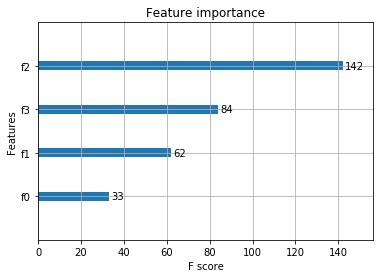

In [6]:
from xgboost import plot_importance
from xgboost import plot_tree

plot_importance(xgboostModel)
print('特徵重要程度: ',xgboostModel.feature_importances_)

## 真實分類

In [9]:
# 建立測試集的 DataFrme
df_test=pd.DataFrame(X_test, columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
df_test['Species'] = y_test
pred = xgboostModel.predict(X_test)
df_test['Predict'] = pred

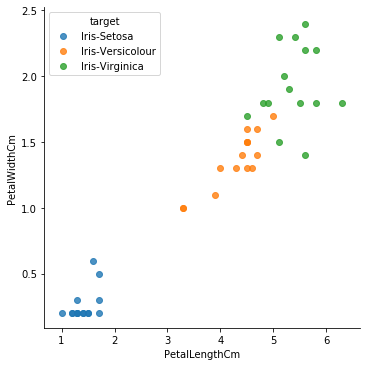

In [10]:
sns.lmplot(x="PetalLengthCm", y="PetalWidthCm", hue='Species', data=df_test, fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])
plt.show()

## XGBoost (測試集)預測結果

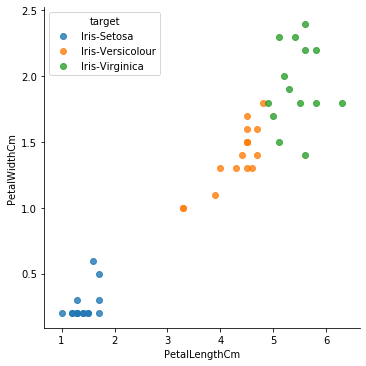

In [11]:
sns.lmplot(x="PetalLengthCm", y="PetalWidthCm", data=df_test, hue="Predict", fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])
plt.show()